# Student Loan Risk with Deep Learning

In [1]:
!pip install tensorflow

In [2]:
# Imports
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential, load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [3]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [4]:
# Review the data types associated with the columns
loans_df.dtypes

,0
payment_history,float64
location_parameter,float64
stem_degree_score,float64
gpa_ranking,float64
alumni_success,float64
study_major_code,float64
time_to_completion,float64
finance_workshop_score,float64
cohort_ranking,float64
total_loan_score,float64


In [5]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

,count
credit_ranking,
1,855
0,744


### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [6]:
# Define the target set y using the credit_ranking column
target = loans_df["credit_ranking"]

# Display a sample of y
target[:5]


,credit_ranking
0,0
1,0
2,0
3,1
4,0


In [7]:
# Define features set X by selecting all columns but credit_ranking
features = loans_df.drop(columns=["credit_ranking"])

# Review the features DataFrame
features.head()


,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Step 3: Split the features and target sets into training and testing datasets.


In [8]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1)


### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [9]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [10]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features



11

Maintaining a constant depth of 2 hidden layers, tested various fibnnacci combinations for the number of nodes in each layer. Constricted the nodes in the deeper layer.

In [11]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = 13


# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = 8


# Define the number of neurons in the output layer
number_output_neurons = 1


Notes on the model:
* Added a Dropout in efforts to improve the model.
* Relu Activation for the 'hidden' layers
* Sigmoid Activation for the 'output' layer

In [12]:
# Create the Sequential model instance
nn = Sequential()


# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
nn.add(Dropout(0.2))  # Dropout rate of 20%


# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))


# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Display the Sequential model summary
nn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 13)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277 (1.08 KB)

 Trainable params: 277 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [14]:
# Compile and fit the Sequential model using the binary_crossentropy loss function, the adam optimizer, and the accuracy evaluation metric
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


Used a fibonacci for batch size and saved some data for validation.

In [15]:
# Fit the model using 50 epochs and the training data
model = nn.fit(X_train_scaled, y_train, epochs=50, batch_size=34, validation_split=0.2)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.4985 - loss: 0.7679 - val_accuracy: 0.5042 - val_loss: 0.7206
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5067 - loss: 0.7172 - val_accuracy: 0.5667 - val_loss: 0.6905
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5233 - loss: 0.6876 - val_accuracy: 0.6542 - val_loss: 0.6675
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6172 - loss: 0.6602 - val_accuracy: 0.6833 - val_loss: 0.6445
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6160 - loss: 0.6575 - val_accuracy: 0.7125 - val_loss: 0.6250
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7123 - loss: 0.6115 - val_accuracy: 0.7375 - val_loss: 0.6040
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6772 - loss: 0.6146 - val_accuracy: 0.7333 - val_loss: 0.5861
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6930 - loss: 0.5909 - val_accuracy: 0.7292 - val

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [16]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss:.4f}, Accuracy: {model_accuracy:.4f}")


13/13 - 0s - 7ms/step - accuracy: 0.7400 - loss: 0.5074
Loss: 0.5074, Accuracy: 0.7400


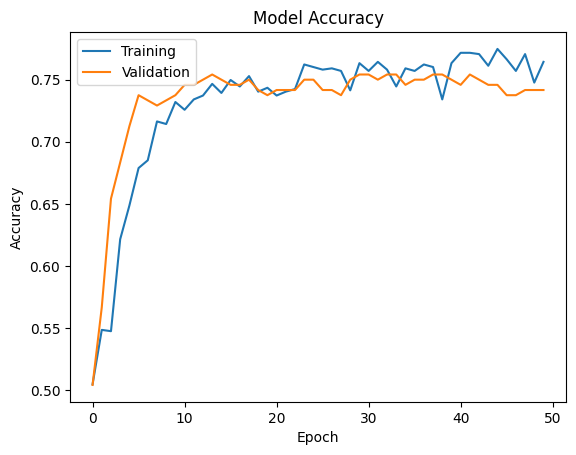

In [17]:
# Plot training & validation accuracy values
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

**Training Accuracy**
* After around 10–15 epochs, the training accuracy fluctuates, but overall it trends upward, reaching close to 80% by the 50th epoch.

**Validation Accuracy**
* Initially, the validation accuracy rises sharply within the first few epochs and reaches a peak of around 75% early in the process (around epoch 10).
* However, after this point, validation accuracy plateaus and even fluctuates slightly, staying roughly close to the 75% range for the rest of the epochs.
* It does not increase significantly beyond epoch 10 and even shows a slight downward trend in some areas.


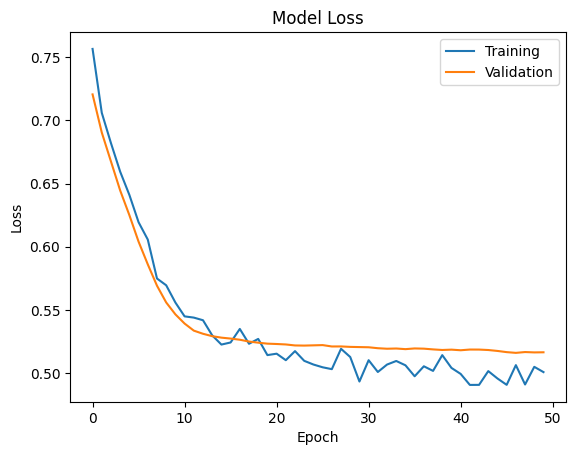

In [18]:
# Plot training & validation loss values
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

**Validation Loss**
1. Around epoch 10, the validation loss plateaus and does not show significant improvement, indicating that the model is no longer improving its generalization performance on unseen data.
2. However, the consistent decrease in training loss suggests that the model is learning and optimizing well with the training data.

### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [19]:
# Save and export your model to a keras file, and name the file student_loans.keras
nn.save("student_loans.keras")
nn.save

# Set the model's file path
file_path = Path("student_loans.keras")

# Export your model to a keras file
nn.save(file_path)



---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [20]:
# Reload your saved model. Set the model's file path.
file_path = Path("student_loans.keras")


# Load the model to a new object
loaded_nn = load_model(file_path)


### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [21]:
# Make predictions with the test data
predictions = loaded_nn.predict(X_test_scaled).round().astype("int32")


# Display a sample of the predictions
display(predictions[:5])


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[0],
       [0],
       [1],
       [1],
       [1]], dtype=int32)

In [22]:
# Save the predictions to a DataFrame and round the predictions to binary results
predictions_df = pd.DataFrame(predictions, columns=["Predictions"])


# Review the DataFrame
display(predictions_df)


,Predictions
0,0
1,0
2,1
3,1
4,1
...,...
395,1
396,0
397,1
398,0


### Step 4: Display a classification report with the y test data and predictions

In [23]:
# Print the classification report with the y test data and predictions
print(classification_report(y_test, predictions))



              precision    recall  f1-score   support

           0       0.70      0.77      0.74       188
           1       0.78      0.71      0.74       212

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



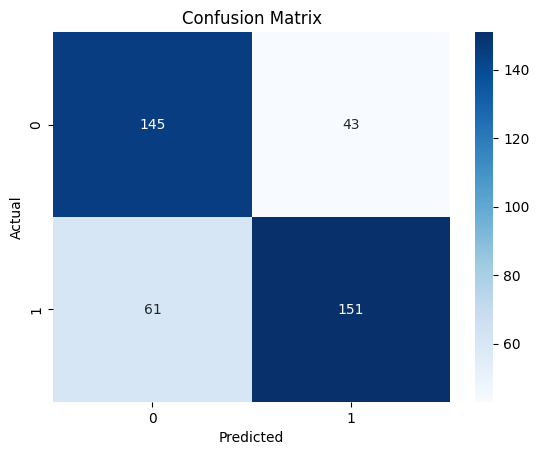

In [24]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**False Positives and False Negatives:**

1. False Positives (43): These are students who were predicted to repay the loan but did not. This could be concerning because it might lead to misinformed recommendations that put students in financial situations they cannot manage.
2. False Negatives (61): These are students who were predicted not to repay the loan but actually did. Missing these cases could prevent potentially qualified students from receiving loan offers they deserve.

---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:

<p> 1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

**Answer**
<p>To build a recommendation system that suggests the best student loan options for students, data is needed that reflects both the students' personal circumstances and the specifics of available loan products, including:<br>
  * Student Financial Information: Current Income, Savings and Assets, Credit History and Credit Score<br>
  * Loan Data: Interest Rates, Repayment Terms, Loan Limits<br>
  * Demographic Information: Age, Location, etc.
<br>---

<p> 2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

**Answer**
<p>The model would be using content-based filtering. Content-based filtering recommends items to users by matching the attributes of items with the attributes or preferences of users. In the context of recommending student loan options, the data collected includes detailed attributes for both the students (users) and the loan products (items). By comparing the student's financial and personal attributes with the features of available loan products, the system can recommend loans that best fit the student's needs.

Collaborative Filtering has a dependence on user interactions and relies on historical interaction data (e.g., ratings, purchases) from many users to find patterns. Students seeking loans may not have prior interaction data, and borrowing behaviors may not be publicly available or relevant.

Context-based filtering incorporates situational factors like time, location, or social environment. While some context (e.g., residence) is considered, it's treated as an attribute within the user and item profiles rather than as dynamic context.
<br>---

<p> 3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

**Answer**
<p>Here are two significant challenges:<br>
1. The recommendation system would require collecting and processing sensitive personal and financial information from students, such as:<br>
  * Personally Identifiable Information (PII): Names, addresses, social security numbers, date of birth.<br>
  * Financial Data: Income levels, credit scores, savings, and assets

Why it's a concern:
  * Regulatory Compliance. Legal Obligations: Handling sensitive data must comply with laws and regulations like.
  * Risk of Data Breaches. Cybersecurity Threats: The system could be a target for cyberattacks aiming to steal sensitive information.


<p>2. The recommendation system must ensure that loan suggestions are fair, unbiased, and do not inadvertently discriminate against any group of students based on protected characteristics, such as race, gender, age, or socioeconomic status.

Why it's a concern:
  * Algorithmic Bias. If the training data reflects historical biases (e.g., certain groups being denied loans more frequently), the model may perpetuate these biases.
  * Transparency and Explainability. Complex models (like deep learning) can make it difficult to understand how decisions are made.